<a href="https://colab.research.google.com/github/Mohit4Rajput/WRE_.nc/blob/main/GZB_WRE_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Restart runtime after running this cell. Use Shift+enter to run individual blocks. 

!pip install importlib-metadata==4.0.1
!pip install xarray==0.18.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown https://drive.google.com/uc?id=1KInf3dW-jvFUBK75XhsfFlMkaYIgT8MK

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1KInf3dW-jvFUBK75XhsfFlMkaYIgT8MK 



In [ ]:
import xarray as xr
xr.__version__
import netCDF4 as nc

In [ ]:
ds = xr.open_dataset('IMD.nc')
ds

FileNotFoundError: ignored

In [ ]:
#IIT Gandhinagar: 27.2046° N, 77.4977° E
Agra  = ds.sel(lat = 27.1767, lon = 78.0081, method = 'nearest')
Agra 

<xarray.Dataset>
Dimensions:  (time: 21170)
Coordinates:
    lat      float64 27.25
    lon      float64 78.0
  * time     (time) datetime64[ns] 1948-01-01 1948-01-02 ... 2005-12-31
Data variables:
    rain     (time) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2022-05-13 23:40:42.719111 Python
    references:   
    comment:      
    crs:          epsg:4326

In [ ]:
Agra.to_netcdf('Agra.nc')

In [ ]:
from google.colab import files
files.download('Agra.nc')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving Agra .nc to Agra .nc


In [ ]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
  import skextremes as ske
  import netCDF4 as nc
except:
  !pip install git+https://github.com/kikocorreoso/scikit-extremes.git
  !pip install git+https://github.com/OpenHydrology/lmoments3.git
  !pip install netCDF4
  import skextremes as ske
  import netCDF4 as nc
import urllib
%matplotlib inline

In [ ]:
ds = xr.open_dataset('Agra .nc')
ds

<xarray.Dataset>
Dimensions:  (time: 21170)
Coordinates:
    lat      float64 ...
    lon      float64 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-01-02 ... 2005-12-31
Data variables:
    rain     (time) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2022-05-13 23:40:42.719111 Python
    references:   
    comment:      
    crs:          epsg:4326

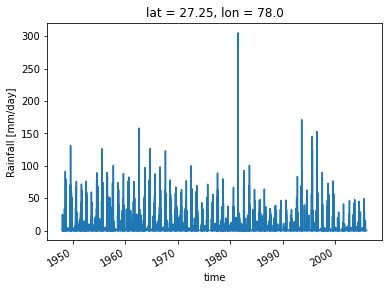

In [ ]:
ds['rain'].plot()

Text(0, 0.5, 'Precipitation level (mm/day)')

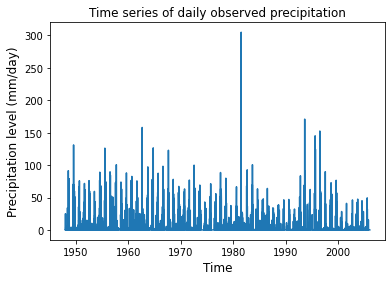

In [ ]:
plt.plot(ds['time'],ds['rain'])
plt.title('Time series of daily observed precipitation')
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Precipitation level (mm/day)", fontsize = 12)

Text(0, 0.5, 'Precipitation level (mm/day)')

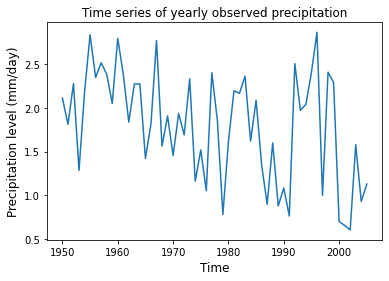

In [ ]:
# plot yearly mean precipitation
observation_yearly = []
for i in range(1950,2006):
    observation_yearly_1 = ds.sel(time=ds.time.dt.year.isin([i])).mean()
    observation_yearly_1 = observation_yearly_1['rain'].values
    observation_yearly.append(observation_yearly_1)
x = np.arange(1950, 2006, dtype=float)
plt.plot(x ,observation_yearly)
plt.title('Time series of yearly observed precipitation')
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Precipitation level (mm/day)", fontsize = 12)

Text(0, 0.5, 'Precipitation level (mm/day)')

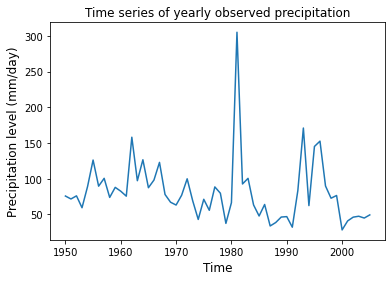

In [ ]:
# plot yearly max precipitation
observation_yearly = []
for i in range(1950,2006):
    observation_yearly_1 = ds.sel(time=ds.time.dt.year.isin([i])).max()
    observation_yearly_1 = observation_yearly_1['rain'].values
    observation_yearly.append(observation_yearly_1)
x = np.arange(1950, 2006, dtype=float)
plt.plot(x ,observation_yearly)
plt.title('Time series of yearly observed precipitation')
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Precipitation level (mm/day)", fontsize = 12)

In [ ]:
from scipy.stats import genextreme
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html

In [ ]:
maxima = ds.groupby('time.year').max('time')
max_list = maxima['rain'].values
print(max_list)

[ 91.38080597 131.10128784  75.79820251  71.67652893  76.03044891
  59.42543793  89.05277252 126.13041687  89.59247589 100.55529785
  73.85887146  87.92249298  82.53496552  75.61656952 158.06932068
  97.22687531 126.54437256  87.42442322  98.17196655 122.86283112
  77.98556519  67.10842896  63.19668198  76.89013672  99.89811707
  69.17243958  43.03546524  71.24152374  55.83808899  88.53453827
  79.74773407  37.5217247   66.53816986 304.92868042  92.67269897
 100.55874634  63.33197403  47.87346649  63.9785881   33.91469193
  38.72170258  46.38677597  46.98733521  32.20908737  83.44060516
 170.91793823  62.39725113 145.15184021 152.56758118  89.83543396
  72.7505188   76.53715515  28.38756943  40.96156693  46.24499893
  47.52116013  45.00544739  49.40921402]


In [ ]:
# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(max_list)
print(shape)
print(loc)
print(scale)

-0.14449545449993517
63.36444120678668
26.091288292187976


In [ ]:
# Compute the return levels for return period.
return_periods = 1000
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)
print(return_levels)

372.6836600771213


In [ ]:
def return_level_calculation(max_list,return_periods):
    # Fit the generalized extreme value distribution to the data.
    shape, loc, scale = genextreme.fit(max_list)
    # Compute the return levels for several return periods.
    return_levels = genextreme.isf(1/return_periods, shape, loc, scale)
    return [return_levels]

In [ ]:
def return_calculation(max_list,return_periods):
    # Fit the generalized extreme value distribution to the data.
    shape, loc, scale = genextreme.fit(max_list)
    # Compute the return levels for several return periods.
    return_levels = genextreme.isf(return_periods, shape, loc, scale)
    return [return_levels]

In [ ]:
# rolling sum of two days
abc = ds.rolling(time=2, center=True).sum()
maxima3 = abc.groupby('time.year').max('time') ['rain'].values
return_levels= return_level_calculation(maxima3, 50)
print(return_levels)

[286.0101129653044]


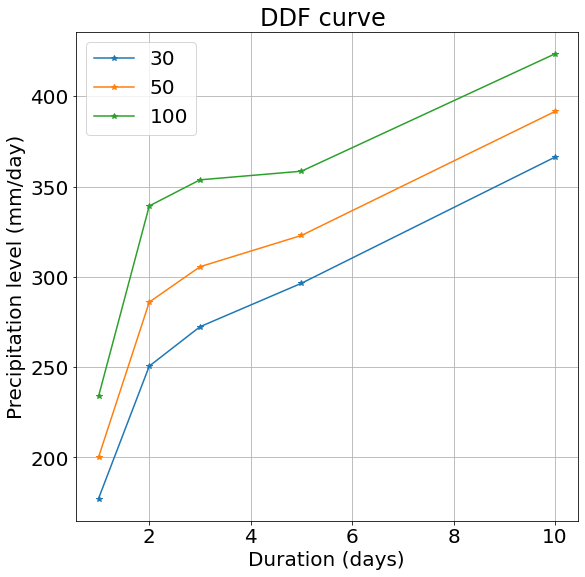

In [ ]:
max_list = []
maxday = [1,2,3,5,10]
return_periods = np.array([30,50,100])
plt.figure(figsize = (9,9))
plt.rcParams.update({'font.size':20})
for j, period1 in enumerate(return_periods):
    data1 =[]
    for k,daymax1 in enumerate(maxday):
        abc = ds.rolling(time=daymax1, center=True).sum()
        maxima3 = abc.groupby('time.year').max('time') ['rain'].values
        return_levels= return_level_calculation(maxima3, period1)
        #print(return_levels)
        data1.append(return_levels)
    plt.plot(maxday ,data1, label = f"{return_periods[j]}", marker = '*' )
    #max_list.append(maxima3)
plt.legend()
plt.grid()
plt.xlabel("Duration (days)")
plt.ylabel("Precipitation level (mm/day)")
plt.title('DDF curve ')
plt.savefig('DDF_curve_roll_number.png')

ValueError: ignored

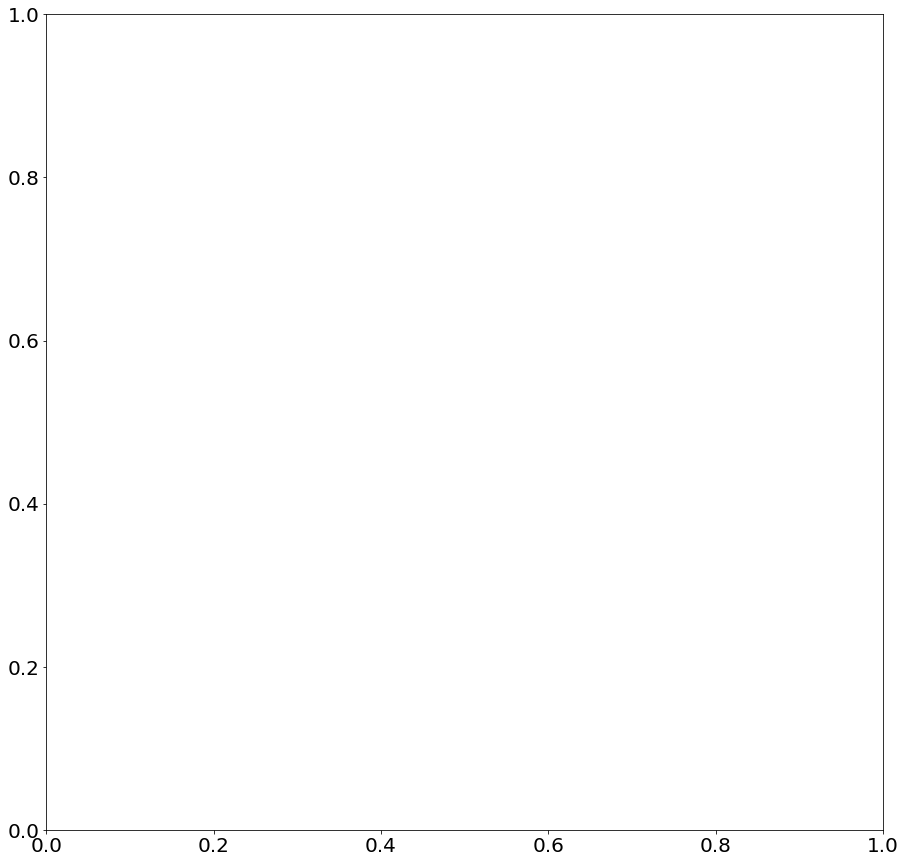

In [ ]:
max_list = []
maxday = [1,2,3,5,10]
return_periods = np.array([30,50,100])
plt.figure(figsize = (15,15))
plt.rcParams.update({'font.size':20})
for j, period1 in enumerate(return_periods):
    data1 =[]
    for k,daymax1 in enumerate(maxday):
        abc = ds.rolling(time=daymax1, center=True).sum()
        maxima3 = abc.groupby('time.year').max('time') ['rain'].values
        return_levels= return_calculation(maxima3, period1)
        #print(return_levels)
        data1.append(return_levels)
    plt.plot(maxday ,data1, label = f"{return_periods[j]}", marker = '*' )
    #max_list.append(maxima3)
plt.legend()
plt.grid()
plt.xlabel("Duration (days)")
plt.ylabel("Precipitation level (mm/day)")
plt.title('DDF curve submitted by (roll number)')
plt.savefig('DDF_curve_roll_number.png')